In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../cs-training.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)
df.dropna(inplace=True)

In [3]:
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149994,0,0.385742,50,0,0.404293,3400.0,7,0,0,0,0.0
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [4]:
data = df.to_numpy()
data

array([[ 1.        ,  0.76612661, 45.        , ...,  6.        ,
         0.        ,  2.        ],
       [ 0.        ,  0.95715102, 40.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        ,  0.65818014, 38.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.29974515, 44.        , ...,  1.        ,
         0.        ,  2.        ],
       [ 0.        ,  0.        , 30.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.85028295, 64.        , ...,  2.        ,
         0.        ,  0.        ]])

In [5]:
X, y = data[:,1:], data[:,0]

### Run SMOTE then use the output in rf pipeline

In [7]:
%run smote.ipynb
# PRODUCES: X_res, Y_res

In [8]:
# We use X_res and Y_res from SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2)

In [9]:
# Grid search Cross Validation
params = {
      "n_estimators":[i for i in range(50,160,10)]
}
cv = GridSearchCV(
       estimator=RandomForestClassifier(n_jobs=-1),
       param_grid=params,
       n_jobs=-1,
       cv=5,
       verbose=1
)

cv.fit(X_train, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'n_estimators': [50, 60, 70, 80, 90, 100, 110, 120,
                                          130, 140, 150]},
             verbose=1)

In [10]:
res = pd.DataFrame(cv.cv_results_)
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,31.263946,0.296089,0.375341,0.066875,50,{'n_estimators': 50},0.968613,0.969462,0.969925,0.970259,0.968252,0.969302,0.000762,10
1,38.745532,2.524183,0.511062,0.048182,60,{'n_estimators': 60},0.968561,0.970079,0.969410,0.969487,0.968715,0.969251,0.000553,11
2,46.248547,0.546871,0.628883,0.137537,70,{'n_estimators': 70},0.968432,0.970156,0.968973,0.970233,0.968793,0.969317,0.000738,9
3,51.807782,0.424747,0.820485,0.050963,80,{'n_estimators': 80},0.969230,0.970002,0.969822,0.970388,0.968767,0.969642,0.000575,6
4,58.282185,0.839176,0.946265,0.047887,90,{'n_estimators': 90},0.969256,0.970413,0.969204,0.970130,0.969076,0.969616,0.000546,7
5,63.755472,0.724319,1.082813,0.145118,100,{'n_estimators': 100},0.969179,0.970053,0.969796,0.970516,0.969050,0.969719,0.000546,5
6,71.618332,1.321699,1.260908,0.055174,110,{'n_estimators': 110},0.969076,0.969847,0.969436,0.970568,0.968741,0.969534,0.000635,8
7,78.383602,0.749514,1.414116,0.127779,120,{'n_estimators': 120},0.969796,0.970594,0.969719,0.970877,0.969127,0.970022,0.000633,1
8,82.909996,0.871095,1.485207,0.076292,130,{'n_estimators': 130},0.969410,0.970594,0.969462,0.970722,0.968690,0.969775,0.000772,3
9,82.586763,5.114361,1.269354,0.202879,140,{'n_estimators': 140},0.969513,0.970311,0.969230,0.970439,0.969487,0.969796,0.000485,2


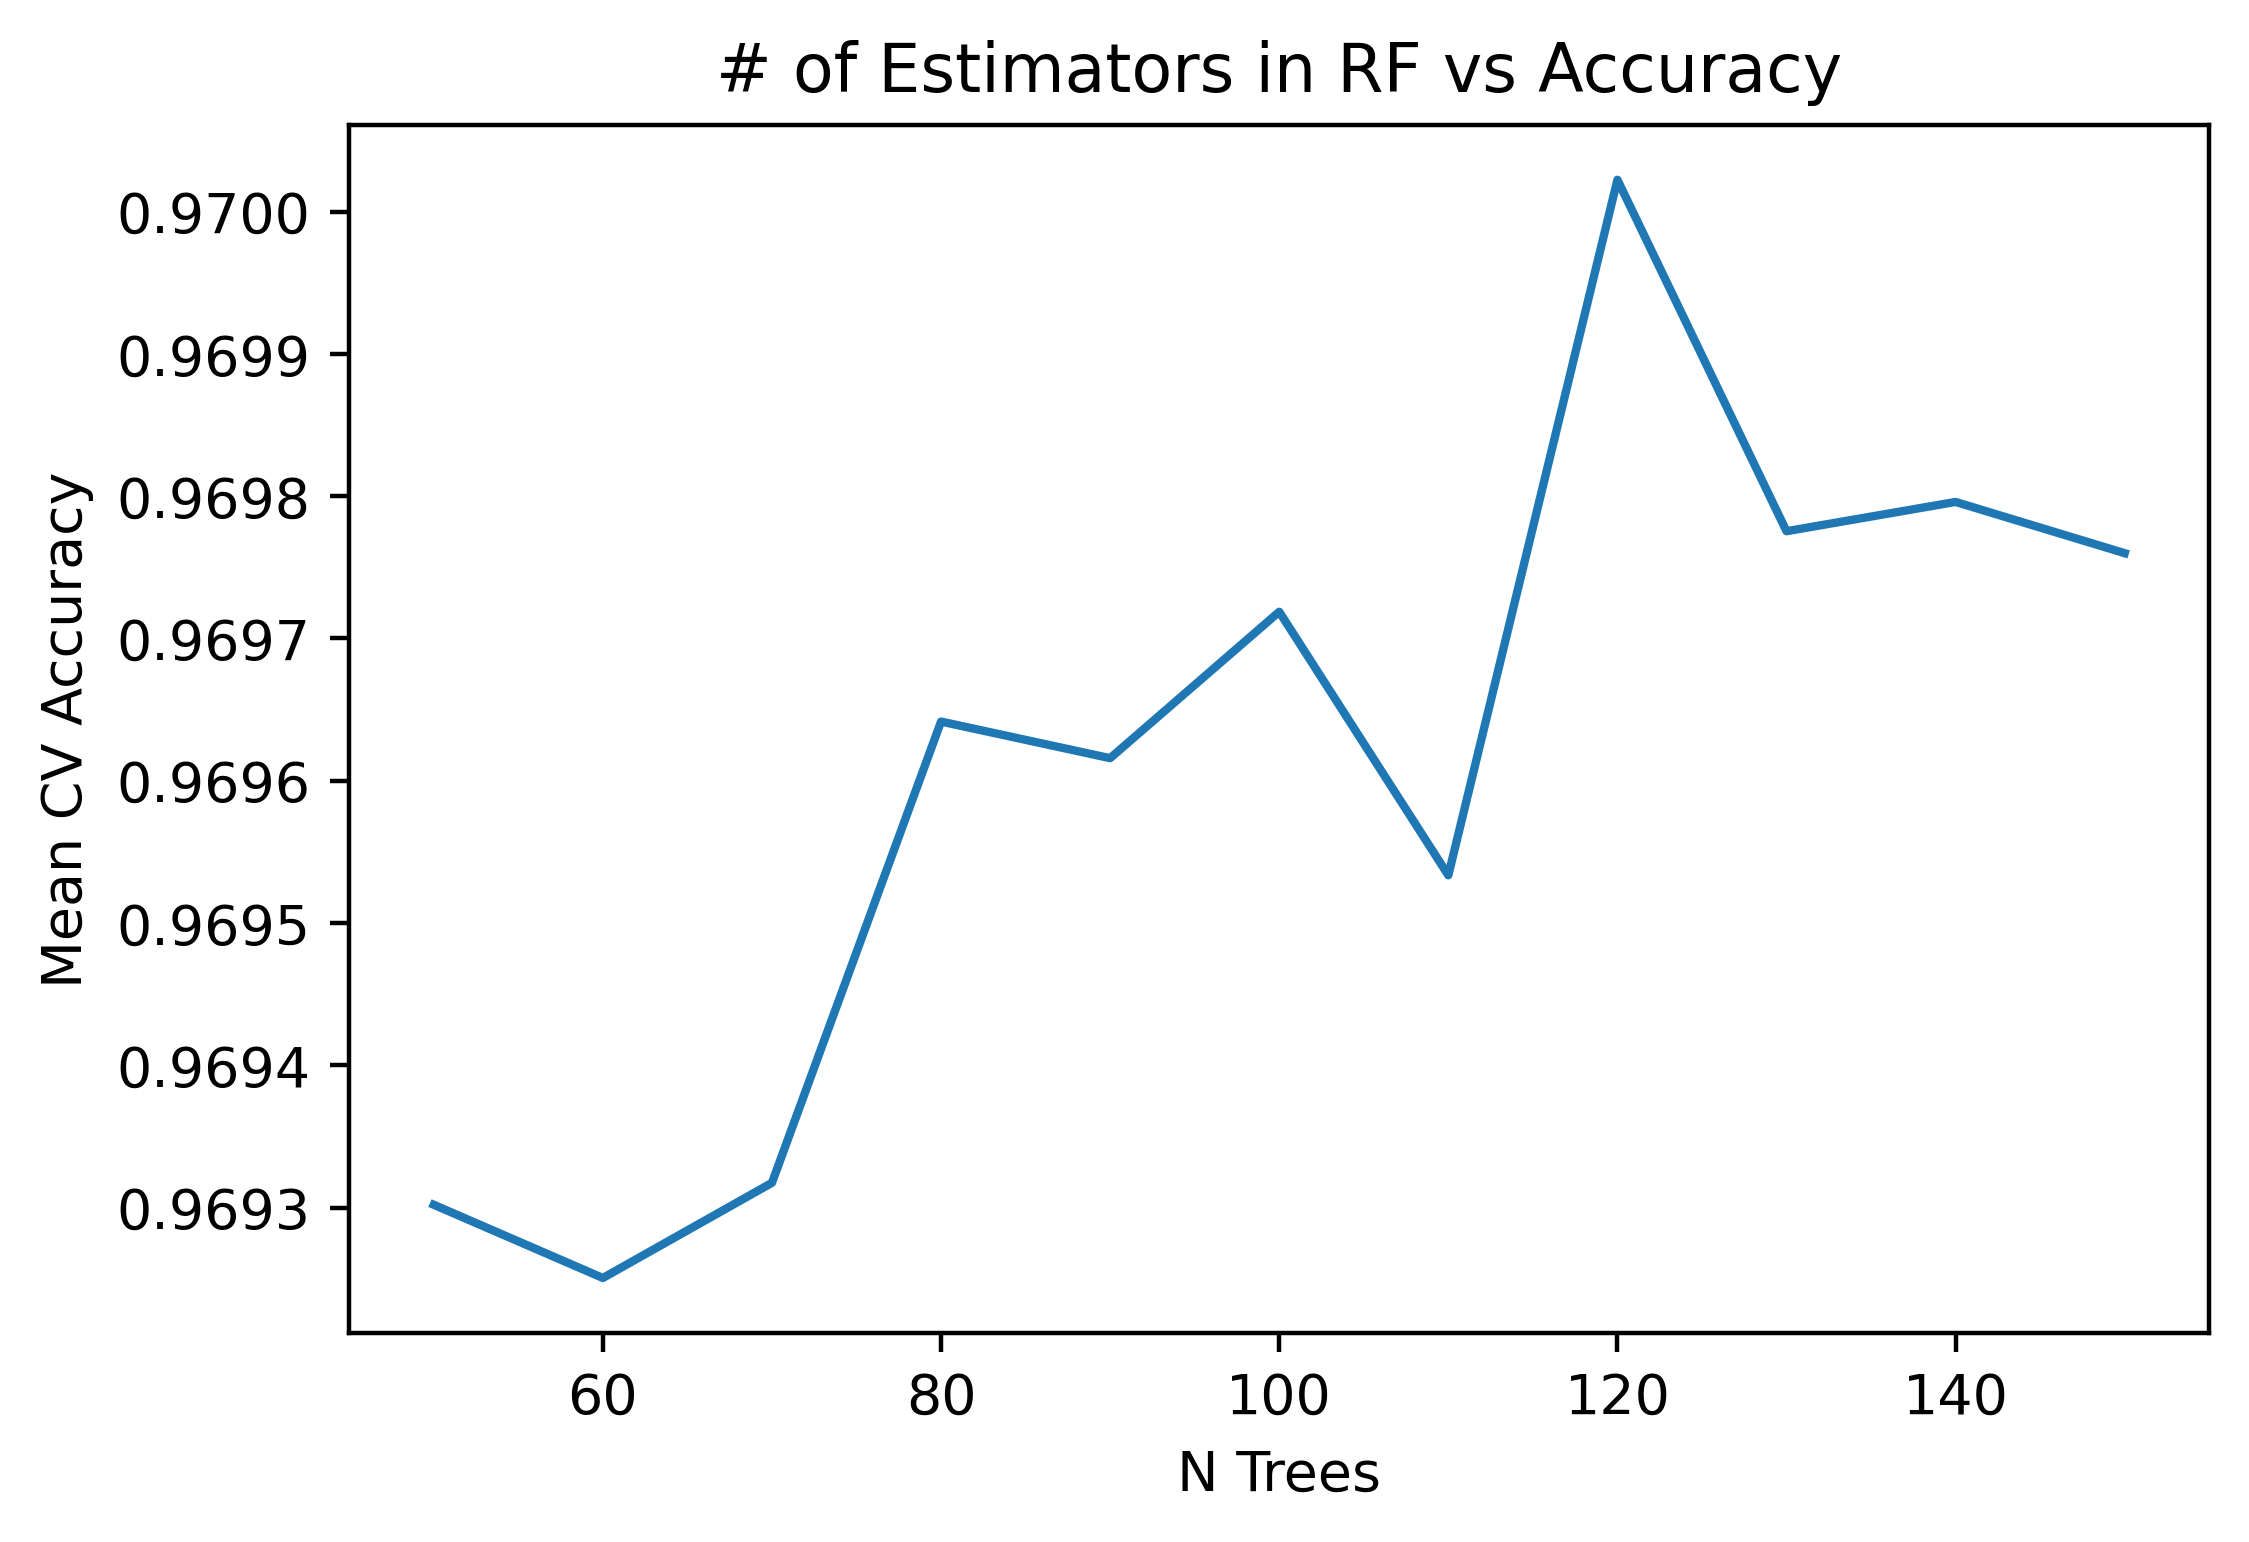

In [11]:
plt.figure(dpi=400) # sets resolution of plot
ax = sns.lineplot(
       data=res,
       x="param_n_estimators",
       y="mean_test_score",
       palette="magma"
)

ax.set(xlabel='N Trees', ylabel='Mean CV Accuracy', title="# of Estimators in RF vs Accuracy")

plt.show()

In [12]:
rf = cv.best_estimator_
print(f"Best CV Score -> {cv.best_score_}")
print("Best Parameters")
for param, val in cv.best_params_.items():
       print(f"{param} -> {val}")

Best CV Score -> 0.9700223828758135
Best Parameters
n_estimators -> 120


We can also see variable importance!

In [13]:
print("Feature Importances\n")
for index, column in enumerate(df.columns[1:]):
       print(f"{column:>36s} -> {rf.feature_importances_[index]*100:.2f}%")

Feature Importances

RevolvingUtilizationOfUnsecuredLines -> 19.47%
                                 age -> 6.15%
NumberOfTime30-59DaysPastDueNotWorse -> 20.29%
                           DebtRatio -> 5.27%
                       MonthlyIncome -> 5.99%
     NumberOfOpenCreditLinesAndLoans -> 5.63%
             NumberOfTimes90DaysLate -> 7.81%
        NumberRealEstateLoansOrLines -> 11.96%
NumberOfTime60-89DaysPastDueNotWorse -> 4.44%
                  NumberOfDependents -> 13.01%


Predict using test set and determine accuracy

In [14]:
pred = rf.predict(X_test)
accuracy = sum(pred==y_test)/len(y_test)
print(f"Accuracy -> {accuracy*100}%")

Accuracy -> 97.18854837713792%


But.. Accuracy isn't enough! Now, for evaluation metrics...
- Confusion Matrix
- Precision, Recall, F1
- AUROC

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score, RocCurveDisplay

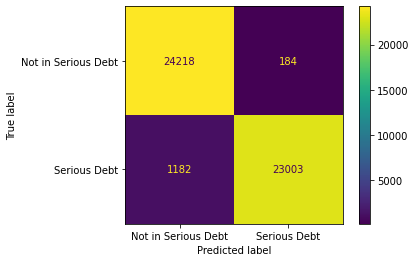

In [16]:
# Confusion Matrix
conf_m = ConfusionMatrixDisplay.from_predictions(y_test, pred, display_labels=["Not in Serious Debt", "Serious Debt"])

In [17]:
# Precision, Recall, and F-1
print(f"Precision -> {precision_score(y_test, pred)}")
print(f"Recall -> {recall_score(y_test, pred)}")
print(f"F-1 -> {f1_score(y_test, pred)}")

Precision -> 0.992064518911459
Recall -> 0.9511267314451106
F-1 -> 0.9711644009119311


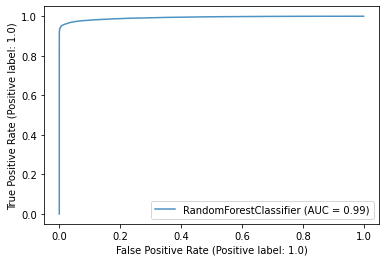

In [18]:
# ROC and AUC-ROC
rfc_disp = RocCurveDisplay.from_estimator(rf, X_test, y_test, alpha=0.8)

# Testing

In [19]:
# sry for some reason relative path was not working on my pc
test = pd.read_csv("../cs-test.csv")

In [20]:
test

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
101498,101499,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101499,101500,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101500,101501,NaN,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
101501,101502,NaN,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0


In [21]:
# drop classification target
test = test.drop("SeriousDlqin2yrs", axis=1)
test = test.drop("Unnamed: 0", axis=1)

In [22]:
test

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...
101498,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101499,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101500,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
101501,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0


In [23]:
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

# iterative impute missing data

imp_mean = IterativeImputer(random_state=0)
test_imp = imp_mean.fit_transform(test)

In [24]:
# predict probabilities instead of 1's and 0's for Kaggle. Note Kaggle probability is supposed to be probability of "1"
pred = rf.predict_proba(test_imp)
len(pred)

temp = pd.DataFrame(pred)
temp = temp.drop(0, axis=1) #drop irrelevant probability 
temp = temp.reset_index(level=0) #for "Id" column
temp.columns = ["Id", "Probability"] #name columns
temp["Id"] += 1 #"Id" column is 1-indexed


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [25]:
temp

,Id,Probability
0,1,0.100000
1,2,0.108333
2,3,0.016667
3,4,0.025000
4,5,0.233333
...,...,...
101498,101499,0.100000
101499,101500,0.433333
101500,101501,0.150000
101501,101502,0.158333


In [26]:
temp.to_csv("SMOTEd.csv", index=False)